<a href="https://colab.research.google.com/github/vaishali071017/Credit-EDA-Credit-Score-Calculation-with-Python/blob/main/Credit_Risk_Analysis_and_Credit_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem statement:**
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1h5ACEvVrvf3FqWgMUcGgyuu2Bql0qwRm

Downloading...
From: https://drive.google.com/uc?id=1h5ACEvVrvf3FqWgMUcGgyuu2Bql0qwRm
To: /content/Credit_score.csv
100% 27.4M/27.4M [00:00<00:00, 38.3MB/s]


In [ ]:
data=pd.read_csv("Credit_score.csv")
data

<ipython-input-3-b77d2fbfda3b>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("Credit_score.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979


In [ ]:
data.shape

(100000, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# **Data cleaning**

In [ ]:
data.duplicated().sum()

0

No duplicate values available in dataset

In [ ]:
missing_values = pd.DataFrame(
    {
    "Missing_values" : data.isna().sum(),
    "Percentage" : data.isna().sum()*100/len(data)
    }
)
missing_values

,Missing_values,Percentage
ID,0,0.000
Customer_ID,0,0.000
Month,0,0.000
Name,9985,9.985
Age,0,0.000
SSN,0,0.000
Occupation,0,0.000
Annual_Income,0,0.000
Monthly_Inhand_Salary,15002,15.002
Num_Bank_Accounts,0,0.000


**Approach -**
1. replacing null values with the appropriate value of each column
2. checking out the special characters in columns

In [ ]:
df = data #creating copy

Removing null from 'Name', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Amount_invested_monthly' by replacing null with the first non-null value for each group of customer id

In [ ]:
for column in ['Name', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
  if df[column].isna().sum() > 0:
    na_cusid = df['Customer_ID'][df[column].isna()]
    df[column] = df[column].fillna(df.groupby('Customer_ID')[column].transform('first'))
    print(f"Filled missing values in column: {column}")

Filled missing values in column: Name
Filled missing values in column: Monthly_Inhand_Salary
Filled missing values in column: Num_Credit_Inquiries
Filled missing values in column: Amount_invested_monthly


replacing null from "Num_of_Delayed_Payment" by the mode for eah group of customer id

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-', '')

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Num_of_Delayed_Payment'].head()

,Num_of_Delayed_Payment
0,7.0
1,NaN
2,7.0
3,4.0
4,NaN


In [ ]:
df['Num_of_Delayed_Payment'].min(), df['Num_of_Delayed_Payment'].max()

(0.0, 4397.0)

In [ ]:
def calculate_mode(series):
    return series.mode()[0] if not series.mode().empty else np.NaN

In [ ]:
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(calculate_mode)

In [ ]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].fillna(df.groupby("Customer_ID")["Num_of_Delayed_Payment"].transform('mean'))

df["Num_of_Delayed_Payment"].min(), df["Num_of_Delayed_Payment"].max()

(0.0, 28.0)

In [ ]:
df.Num_of_Delayed_Payment.value_counts()

,count
Num_of_Delayed_Payment,
19.0,6392
10.0,6200
20.0,6184
16.0,6160
15.0,6032
8.0,5904
18.0,5760
17.0,5752
9.0,5744


In [ ]:
df.Num_of_Delayed_Payment.isna().sum()

0

converting num_of_Delayed_Payment into integer as this shows number of days and days can be integer only

In [ ]:
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment.astype(int)

Converting credit history age into gloat numbers to read exact number of age

In [ ]:
def convert_to_float(text):
    if pd.isnull(text):
        return np.nan
    years, months = 0, 0
    if 'Years' in text:
        years = int(text.split(' Years')[0])
    if 'Months' in text:
        months = int(text.split(' and ')[-1].split(' Months')[0])
    return float(f"{years}.{months:02d}")

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_float)

In [ ]:
def fill_progressive(group):
  last_valid = None
  new_values = []
  for value in group:
    if not pd.isna(value):
      last_valid = value
      new_values.append(value)
    else:
      if last_valid is not None:
        last_valid += 0.01
        new_values.append(round(last_valid,2))
      else:
        new_values.append(value)
  return new_values

df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(fill_progressive)

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22.01,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,22.02,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,22.03,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,22.04,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22.05,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,34.663572,31.06,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,40.565631,31.07,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,41.255522,31.08,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,33.638208,31.09,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979


In [ ]:
def custom_fill(group):
    new_values = []
    previous_value = None

    for i, value in enumerate(group):
        if pd.isna(value):  # Check if the value is NaN
            if previous_value is None:  # If the first value is NaN
                # Check the next valid value
                next_valid_index = group[i:].first_valid_index()
                if next_valid_index is not None:
                    # Set the NaN to the next valid value minus 0.01
                    next_valid_value = group[next_valid_index]
                    value = round(next_valid_value - 0.01, 2)
                new_values.append(value)
            else:
                # Increment previous value by 0.01
                previous_value = round(previous_value + 0.01, 2)
                new_values.append(previous_value)
        else:
            previous_value = value
            new_values.append(value)

    return new_values


df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(custom_fill)

In [ ]:
df['Credit_History_Age']

,Credit_History_Age
0,22.01
1,22.02
2,22.03
3,22.04
4,22.05
...,...
99995,31.06
99996,31.07
99997,31.08
99998,31.09


In [ ]:
df.Credit_History_Age.min(), df.Credit_History_Age.max()

(0.01, 33.08)

In [ ]:
df.Credit_History_Age.isna().sum()

0

In monthly_balance column there is only 1 value which doesn't make sense so converting that value (__-333333333333333333333333333__) to 0 because the value is in negative and monthyl balance can not be negative, the smallest value can only be 0

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', 0)

In [ ]:
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float)
df["Monthly_Balance"] = df["Monthly_Balance"].fillna(df.groupby("Customer_ID")["Monthly_Balance"].transform("mean"))

In [ ]:
df.Monthly_Balance.isna().sum()

0

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)

When num of loan is 0 then type of loan is not available

In [ ]:
df.loc[(df['Num_of_Loan'] <= 0), ['Num_of_Loan', 'Type_of_Loan']] = [0, 'Not Available']
df["Type_of_Loan"].isna().sum()

61

In [ ]:
df["Type_of_Loan"] = df["Type_of_Loan"].fillna(df.groupby("Customer_ID")["Type_of_Loan"].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else ''))

In [ ]:
df["Type_of_Loan"].isna().sum()

0

Null values have been removed now cleaning the dataset

checking out the special symbols in columns if any

In [ ]:
print(df['Customer_ID'].nunique())
special_chars = '[^a-zA-Z0-9_ ]'
Customer_ID_with_special_chars = df[df['Customer_ID'].str.contains(special_chars)]
print(Customer_ID_with_special_chars['Customer_ID'])

12500
Series([], Name: Customer_ID, dtype: object)


In [ ]:
print(df['Name'].nunique())
special_chars = '[^a-zA-Z0-9_ ]'
Name_with_special_chars = df[df['Name'].str.contains(special_chars)]
print(Name_with_special_chars['Name'])

10139
376      "John ODonnell"p
377      "John ODonnell"p
378      "John ODonnell"p
379      "John ODonnell"p
380      "John ODonnell"p
               ...       
99707                 N.o
99708                 N.o
99709                 N.o
99710                 N.o
99711                 N.o
Name: Name, Length: 3768, dtype: object


In [ ]:
df['Name'] = df['Name'].str.replace(special_chars, '')

In [ ]:
print(df['Name'].nunique())
special_chars = '[^a-zA-Z0-9_ ]'
Name_with_special_chars = df[df['Name'].str.contains(special_chars)]
print(Name_with_special_chars['Name'])

10139
376      "John ODonnell"p
377      "John ODonnell"p
378      "John ODonnell"p
379      "John ODonnell"p
380      "John ODonnell"p
               ...       
99707                 N.o
99708                 N.o
99709                 N.o
99710                 N.o
99711                 N.o
Name: Name, Length: 3768, dtype: object


In [ ]:
print(df['SSN'].nunique())
special_chars = '[^-a-zA-Z0-9_]'
SSN_with_special_chars = df[df['SSN'].str.contains(special_chars)]
print(SSN_with_special_chars['SSN'])

12501
7        #F%$D@*&8
29       #F%$D@*&8
51       #F%$D@*&8
54       #F%$D@*&8
98       #F%$D@*&8
           ...    
99914    #F%$D@*&8
99942    #F%$D@*&8
99946    #F%$D@*&8
99968    #F%$D@*&8
99988    #F%$D@*&8
Name: SSN, Length: 5572, dtype: object


In [ ]:
df.loc[df["SSN"] == "#F%$D@*&8", "SSN"] = np.NaN
df["SSN"] = df["SSN"].fillna(df.groupby("Customer_ID")["SSN"].transform('first'))

In [ ]:
print(df['SSN'].nunique())
special_chars = '[^-a-zA-Z0-9_]'
SSN_with_special_chars = df[df['SSN'].str.contains(special_chars)]
print(SSN_with_special_chars['SSN'])

12500
Series([], Name: SSN, dtype: object)


In [ ]:
print(df['Occupation'].nunique())
special_chars = '[^a-zA-Z0-9_]'
Occupation_with_special_chars = df[df['Occupation'].str.contains(special_chars)]
print(Occupation_with_special_chars['Occupation'])

16
Series([], Name: Occupation, dtype: object)


In [ ]:
print(df['Credit_Mix'].nunique())
special_chars = '[^a-zA-Z0-9]'
Credit_Mix_with_special_chars = df[df['Credit_Mix'].str.contains(special_chars)]
print(Credit_Mix_with_special_chars['Credit_Mix'])

4
0        _
10       _
19       _
29       _
35       _
        ..
99988    _
99992    _
99994    _
99995    _
99996    _
Name: Credit_Mix, Length: 20195, dtype: object


In [ ]:
df.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = np.NaN
df['Credit_Mix'] = df['Credit_Mix'].fillna(df.groupby('Customer_ID')['Credit_Mix'].transform('first'))

In [ ]:
print(df['Payment_Behaviour'].nunique())
special_chars = '[^a-zA-Z0-9_]'
Payment_Behaviour_with_special_chars = df[df['Payment_Behaviour'].str.contains(special_chars)]
print(Payment_Behaviour_with_special_chars['Payment_Behaviour'])

7
5        !@9#%8
16       !@9#%8
32       !@9#%8
47       !@9#%8
54       !@9#%8
          ...  
99947    !@9#%8
99980    !@9#%8
99982    !@9#%8
99989    !@9#%8
99999    !@9#%8
Name: Payment_Behaviour, Length: 7600, dtype: object


In [ ]:
df.loc[df["Payment_Behaviour"] == "!@9#%8", "Payment_Behaviour"] = np.NaN
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df.groupby('Customer_ID')['Payment_Behaviour'].transform('first'))

In [ ]:
print(df['Payment_Behaviour'].nunique())
special_chars = '[^a-zA-Z0-9_]'
Payment_Behaviour_with_special_chars = df[df['Payment_Behaviour'].str.contains(special_chars)]
print(Payment_Behaviour_with_special_chars['Payment_Behaviour'])

6
Series([], Name: Payment_Behaviour, dtype: object)


In [ ]:
special_chars = '[^0-9.]'
Amount_invested_monthly_with_special_chars = df[df['Amount_invested_monthly'].str.contains(special_chars)]
print(Amount_invested_monthly_with_special_chars['Amount_invested_monthly'])

18       __10000__
23       __10000__
28       __10000__
121      __10000__
142      __10000__
           ...    
99879    __10000__
99882    __10000__
99919    __10000__
99951    __10000__
99973    __10000__
Name: Amount_invested_monthly, Length: 4541, dtype: object


In [ ]:
df.loc[df["Amount_invested_monthly"] == "__10000__", 'Amount_invested_monthly'] = np.NaN
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df.groupby('Customer_ID')['Amount_invested_monthly'].transform('first'))

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [ ]:
print(df['Type_of_Loan'].nunique())
special_chars = '[^-a-zA-Z0-9_ ]'
Type_of_Loan_with_special_chars = df[df['Type_of_Loan'].str.contains(special_chars)]
print(Type_of_Loan_with_special_chars['Type_of_Loan'])

6261
0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 74463, dtype: object


In [ ]:
df.loc[df["Payment_of_Min_Amount"] == "NM", "Payment_of_Min_Amount"] = np.NaN
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].fillna(df.groupby("Customer_ID")["Payment_of_Min_Amount"].transform('first'))

In [ ]:
print(df["Age"].nunique())
special_values = '[^0-9]'
Age_with_special_values = df[df['Age'].str.contains(special_chars)]
print(Age_with_special_values['Age'])
Age_with_special_values['Age'].value_counts()

1788
Series([], Name: Age, dtype: object)


,count
Age,


In [ ]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(calculate_mode)

In [ ]:
df.Age.value_counts()

,count
Age,
28,3136
31,3104
26,3048
25,3016
38,2992
36,2952
39,2952
44,2936
34,2920


In [ ]:
df['Age'] = df['Age'].str.replace('_','')
df['Age'].value_counts()

,count
Age,
28,3136
31,3104
26,3048
25,3016
38,2992
39,2952
36,2952
44,2944
27,2920


In [ ]:
df.loc[df['Age'] == "-500"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
32064,0xd1e2,CUS_0x1c5d,January,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21,1501.434167,8,...,6.0,Standard,448.39,35.789130,14.09,Yes,79.711652,156.396234,Low_spent_Small_value_payments,204.035531
32065,0xd1e3,CUS_0x1c5d,February,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21,1501.434167,8,...,6.0,Standard,448.39,27.210284,14.10,Yes,79.711652,68.287402,Low_spent_Large_value_payments,272.144363
32066,0xd1e4,CUS_0x1c5d,March,Christiaan Hetznerb,-500,084-74-2355,_______,19121.21,1501.434167,8,...,6.0,Standard,448.39,37.785015,14.11,Yes,79.711652,173.093805,Low_spent_Small_value_payments,187.337960
32067,0xd1e5,CUS_0x1c5d,April,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21,1501.434167,8,...,6.0,Standard,448.39,26.175230,15.00,Yes,79.711652,66.538890,Low_spent_Small_value_payments,293.892875
32068,0xd1e6,CUS_0x1c5d,May,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21,1501.434167,8,...,6.0,Standard,448.39,38.217493,15.01,Yes,79.711652,90.437364,Low_spent_Small_value_payments,269.994401
32069,0xd1e7,CUS_0x1c5d,June,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21_,1501.434167,8,...,6.0,Standard,448.39,30.949719,15.02,Yes,79.711652,76.161929,Low_spent_Small_value_payments,284.269835
32070,0xd1e8,CUS_0x1c5d,July,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21,1501.434167,8,...,6.0,Standard,448.39,24.753461,15.03,Yes,79.711652,134.143207,Low_spent_Small_value_payments,226.288558
32071,0xd1e9,CUS_0x1c5d,August,Christiaan Hetznerb,-500,084-74-2355,Musician,19121.21,1501.434167,8,...,6.0,Standard,448.39,39.248660,15.04,Yes,79.711652,56.523548,Low_spent_Small_value_payments,293.908216


In [ ]:
df.loc[df['Age'] == "-500", 'Age'] = 19

In [ ]:
df['Age'] = df['Age'].astype(int)
df.reset_index(inplace =True)

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [ ]:
df.loc[df['Annual_Income'] < 0, 'Annual_Income']

,Annual_Income


In [ ]:
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform(calculate_mode)

In [ ]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].astype(float)

In [ ]:
df.loc[df['Monthly_Inhand_Salary'] < 0, 'Monthly_Inhand_Salary']

,Monthly_Inhand_Salary


In [ ]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(calculate_mode)

In [ ]:
df['Num_Bank_Accounts'].min(), df['Num_Bank_Accounts'].max()

(-1, 1798)

In [ ]:
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(calculate_mode)

In [ ]:
df.loc[df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = 0

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(int)
df['Num_Bank_Accounts'].min(), df['Num_Bank_Accounts'].max()

(0, 10)

In [ ]:
df['Num_Credit_Card'].min(), df['Num_Credit_Card'].max()

(0, 1499)

In [ ]:
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(calculate_mode)

In [ ]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype(int)
df['Num_Credit_Card'].min(), df['Num_Credit_Card'].max()

(0, 11)

In [ ]:
num_col = ['Interest_Rate', 'Num_of_Loan', 'Outstanding_Debt', 'Total_EMI_per_month', 'Num_Credit_Inquiries']
for col in num_col:
  df[col] = df.groupby('Customer_ID')[col].transform(calculate_mode)

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].astype(float)
df['Interest_Rate'] = df['Interest_Rate'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

In [ ]:
df.loc[df['Changed_Credit_Limit']== "_", "Changed_Credit_Limit"] = np.NaN
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(calculate_mode)

In [ ]:
df.loc[df['Changed_Credit_Limit']== "_", "Changed_Credit_Limit"]

,Changed_Credit_Limit


In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Changed_Credit_Limit'].isna().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     100000 non-null  int64  
 1   ID                        100000 non-null  object 
 2   Customer_ID               100000 non-null  object 
 3   Month                     100000 non-null  object 
 4   Name                      100000 non-null  object 
 5   Age                       100000 non-null  int64  
 6   SSN                       100000 non-null  object 
 7   Occupation                100000 non-null  object 
 8   Annual_Income             100000 non-null  float64
 9   Monthly_Inhand_Salary     100000 non-null  float64
 10  Num_Bank_Accounts         100000 non-null  int64  
 11  Num_Credit_Card           100000 non-null  int64  
 12  Interest_Rate             100000 non-null  float64
 13  Num_of_Loan               100000 non-null  in

All columns have cleaned

In [ ]:
df

,index,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,4,Good,809.98,26.822620,22.01,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,4,Good,809.98,31.944960,22.02,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163
2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,4,Good,809.98,28.609352,22.03,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,4,Good,809.98,31.377862,22.04,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,4,Good,809.98,24.797347,22.05,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,3,Good,502.38,34.663572,31.06,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228
99996,99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,3,Good,502.38,40.565631,31.07,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610
99997,99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,3,Good,502.38,41.255522,31.08,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083
99998,99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,3,Good,502.38,33.638208,31.09,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979


In [ ]:
df.shape

(100000, 28)

In [ ]:
df.Customer_ID.nunique()

12500

Aggregating all information for each customer

In [ ]:
aggregation_functions = {
    'Name': 'first',
    'Age' : 'first',
    'Occupation': 'first',
    'SSN': 'first',
    'Annual_Income': lambda x: x.mode()[0] if not x.empty else None,
    'Monthly_Inhand_Salary': lambda x: x.mode()[0] if not x.empty else None,
    'Num_Bank_Accounts': lambda x: x.mode()[0] if not x.empty else None,
    'Num_Credit_Card': lambda x: x.mode()[0] if not x.empty else None,
    'Interest_Rate': lambda x: x.mode()[0] if not x.empty else None,
    'Num_of_Loan': lambda x: x.mode()[0] if not x.empty else None,
    'Delay_from_due_date': 'max',
    'Num_of_Delayed_Payment': 'max',
    'Changed_Credit_Limit': 'mean',
    'Num_Credit_Inquiries': lambda x: x.mode()[0] if not x.empty else None,
    'Credit_Mix': lambda x: x.mode()[0] if not x.empty else None,
    'Outstanding_Debt': 'mean',
    'Credit_Utilization_Ratio': 'mean',
    'Credit_History_Age': 'max',
    'Payment_of_Min_Amount': lambda x: x.mode()[0] if not x.empty else None,
    'Total_EMI_per_month': 'mean',
    'Amount_invested_monthly': 'mean',
    'Payment_Behaviour': lambda x: x.mode()[0] if not x.empty else None,
    'Monthly_Balance': 'mean'
}

# Group by 'Customer_ID' and aggregate
aggregated_df = df.groupby('Customer_ID').agg(aggregation_functions).reset_index()

In [ ]:
aggregated_df.head()

,Customer_ID,Name,Age,Occupation,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0x1000,Alistair Barrf,17,Lawyer,913-74-1218,30625.94,2706.161667,6,5,27.0,...,11,Bad,1562.91,33.477546,10.09,Yes,42.941090,158.549735,Low_spent_Large_value_payments,335.375341
1,CUS_0x1009,Arunah,26,Mechanic,063-67-6938,52312.68,4250.390000,6,5,17.0,...,2,Standard,202.68,29.839984,31.00,Yes,108.366467,146.679378,High_spent_Medium_value_payments,428.743155
2,CUS_0x100b,Shirboni,18,Media_Manager,238-62-0395,113781.39,9549.782500,1,4,1.0,...,1,Good,1030.20,34.841449,15.10,No,0.000000,478.350356,High_spent_Large_value_payments,781.229776
3,CUS_0x1011,Schneyerh,44,Doctor,793-05-8223,58918.47,5208.872500,3,3,17.0,...,7,Standard,473.14,27.655897,15.10,Yes,123.434939,281.499223,Low_spent_Medium_value_payments,332.642837
4,CUS_0x1013,Cameront,44,Mechanic,930-49-9615,98620.98,7962.415000,3,3,6.0,...,3,Good,1233.51,31.933940,17.10,No,228.018084,355.442408,High_spent_Medium_value_payments,472.781009


In [ ]:
aggregated_df.shape

(12500, 24)

## **Data visualization**

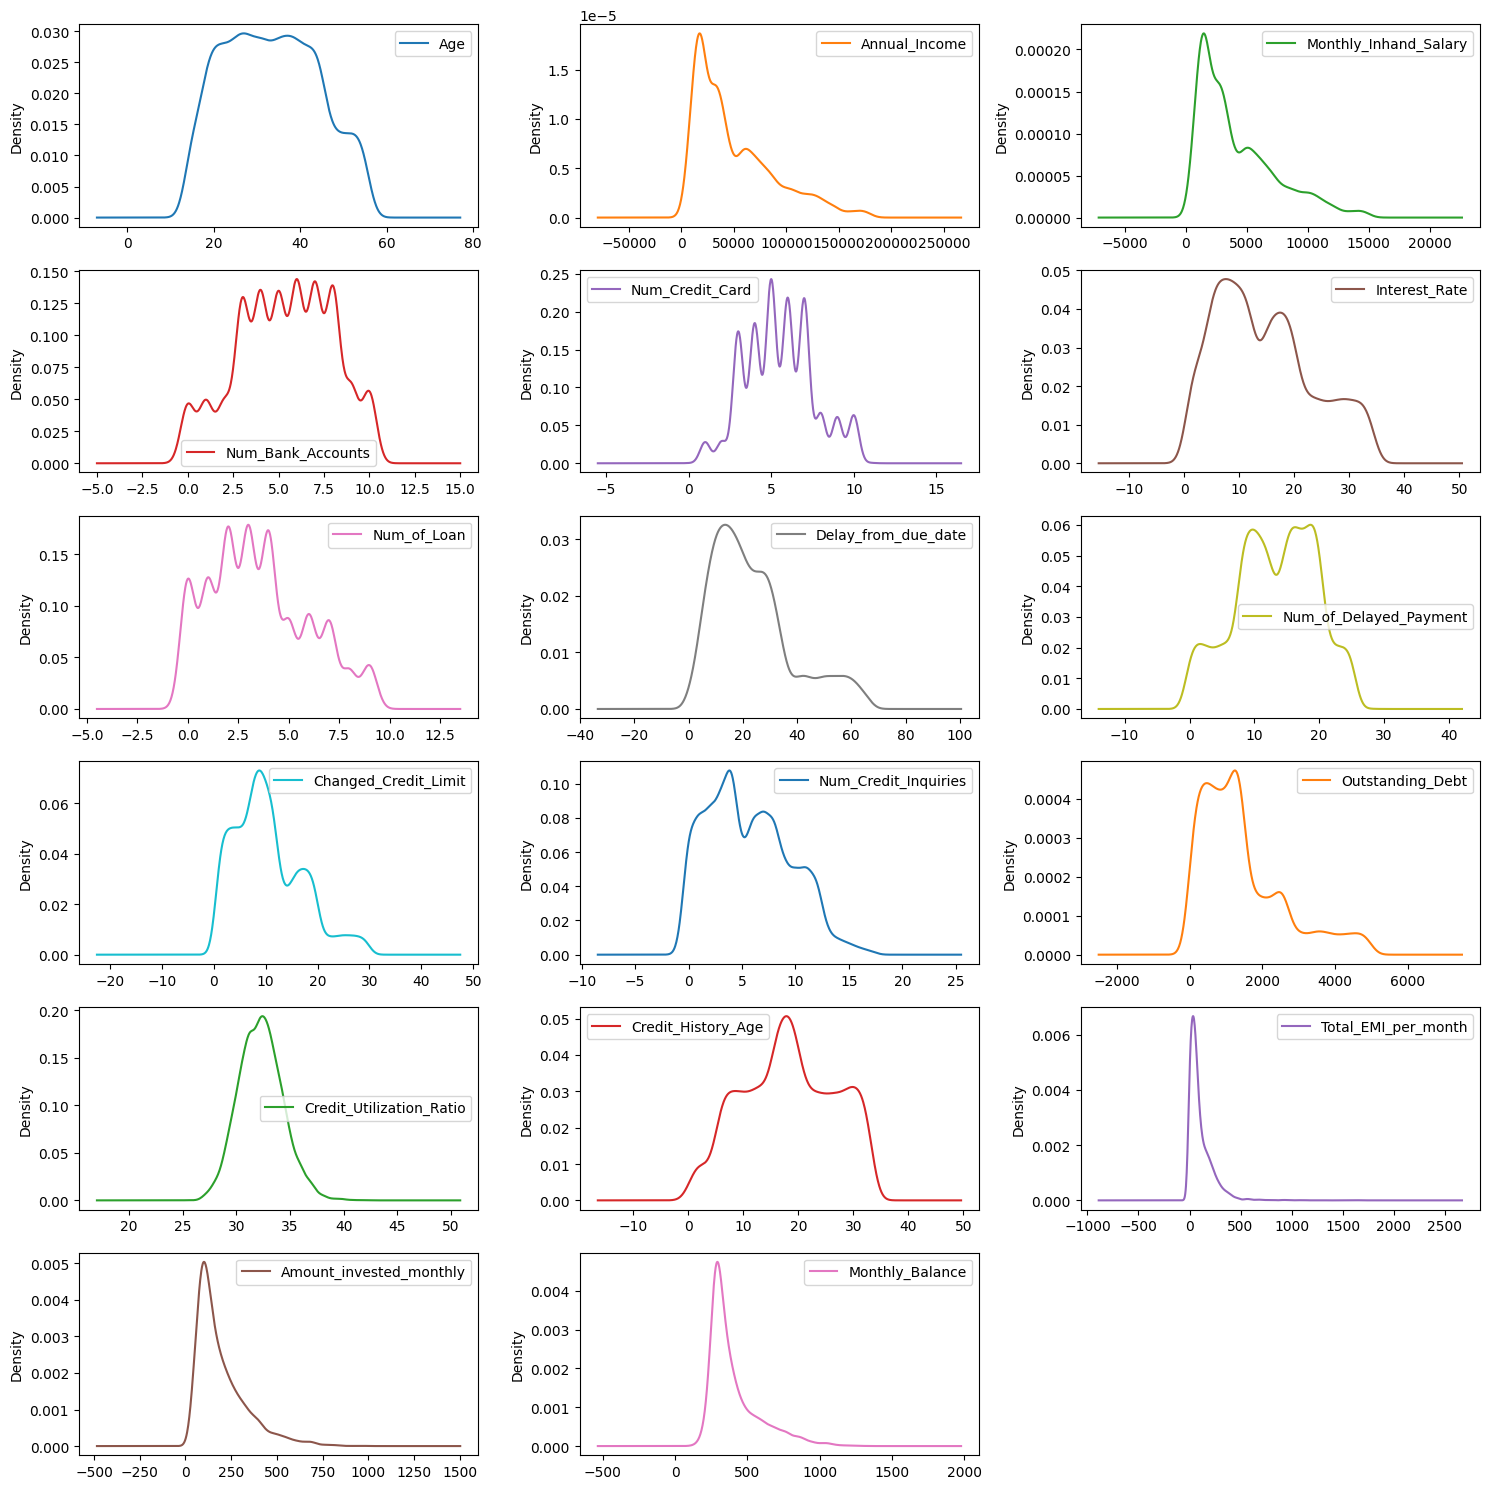

In [ ]:
plt.rcParams["figure.figsize"] = [15, 15]
aggregated_df.plot(kind='density', subplots=True, layout=(6, 3), sharex=False)
plt.tight_layout()
plt.show()

Annual_Income: positively skewed, more data points at lower income level and few at high income level.

Monthly_Inhand_Salary: positively skewed, lower salary is more common and high salary has less frequency.

Interest_Rate: Negatively skewed, most people are paying high interest rate.

Num_of_Loan: Approximately symmetrical distribution, but subtle positive skewness. Some higher values in the number of loans taken.

Delay_from_due_date: Most data points cluster before the due date (around -10). A long tail extends to the right, indicating occasional delays beyond the due date.

Num_of_Delayed_Payment: Sharp peak near 0 suggests most delayed payments are low in number. Long tail to the right indicates occasional high values.

Changed_Credit_Limit: Two peaks: one near 0 and another around 6000. Common values for credit limit changes, with some larger changes less frequent.

Num_Credit_Inquiries: Peak close to 0 implies most inquiries are low in number. Long tail to the right shows some higher values.

Outstanding_Debt: Sharp peak around -2000. Variability on both lower and higher ends.

Credit_Utilization_Ratio: Highest peak just below 0.2. Longer left tail toward lower ratios.

Credit_History_Age: The distribution is positively skewed. Most data points cluster at lower credit history ages, with a long tail extending to the right. This suggests that individuals with shorter credit histories are more common.

Total_EMI_per_month: The distribution has a sharp peak on the left side. There’s a long tail extending to the right, indicating extreme values. This suggests that most individuals have relatively low EMIs, but there are some with exceptionally high EMIs.

Amount_Invested_Monthly: Similar to the other distributions, this one also exhibits right skewness. Most data points are concentrated on the left side, with fewer extending towards higher investment amounts. This implies that smaller monthly investment amounts are more common.

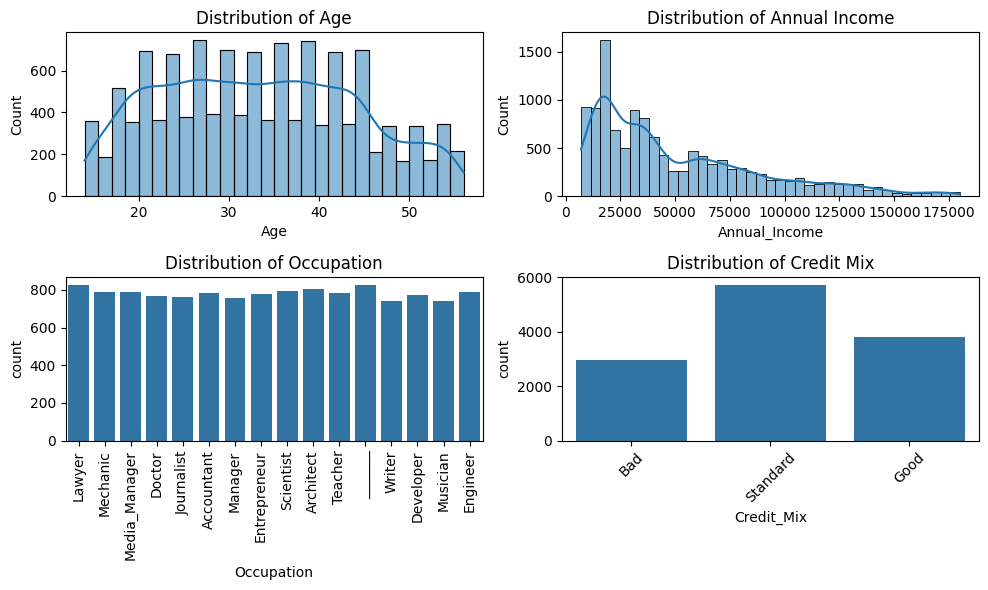

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Age distribution with KDE
plt.subplot(2, 2, 1)
sns.histplot(aggregated_df['Age'], kde=True)
plt.title("Distribution of Age")

# Plot Annual Income distribution with KDE
plt.subplot(2, 2, 2)
sns.histplot(aggregated_df['Annual_Income'], kde=True)
plt.title("Distribution of Annual Income")

# Plot Occupation distribution
plt.subplot(2, 2, 3)
sns.countplot(x=aggregated_df['Occupation'])
plt.title("Distribution of Occupation")
plt.xticks(rotation=90)

# Plot Credit Mix distribution
plt.subplot(2, 2, 4)
sns.countplot(x=aggregated_df['Credit_Mix'])
plt.title("Distribution of Credit Mix")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Age Distribution: Most customers fall within the middle age range (between 30 and 50 years). There are fewer customers in the younger and older age groups.

Annual Income Distribution: The majority of customers have annual incomes between 25000 and 75000. Fewer customers fall into higher income brackets.

Occupation Diversity: Customers come from various professions, including writers, programmers, executives, doctors, lawyers, teachers, and more. This diversity suggests a broad occupational background among the customer base.

Credit Mix: The credit mix is categorized into ‘Bad,’ ‘Standard,’ and ‘Good.’ The ‘Standard’ category has the highest count, indicating a balanced mix of credit profiles.

## **Feature Engineering**

In [ ]:
aggregated_df['nu_Credit_Mix'] = aggregated_df['Credit_Mix'].apply(lambda x: 0 if x == 'Bad' else 1 if x == 'Standard' else 2)

In [ ]:
def normal(x):
  return (x - x.min()) / (x.max() - x.min())

# Calculate and add 'N_Credit_Mix' to the DataFrame
aggregated_df['N_Credit_Mix'] = (normal(aggregated_df['nu_Credit_Mix'])).astype(float)

aggregated_df['N_Credit_Mix'].head()

,N_Credit_Mix
0,0.0
1,0.5
2,1.0
3,0.5
4,1.0


In [ ]:
aggregated_df['nu_Payment_of_Min_Amount'] = aggregated_df['Payment_of_Min_Amount'].apply(lambda x: 1 if x == 'Yes' else 0)
aggregated_df['nu_Payment_of_Min_Amount'].head()

,nu_Payment_of_Min_Amount
0,1
1,1
2,0
3,1
4,0


In [ ]:
def normal(x):
  return (x - x.min()) / (x.max() - x.min())
aggregated_df['N_Payment_of_Min_Amount'] = (normal(aggregated_df['nu_Payment_of_Min_Amount'])).astype(float)
aggregated_df['N_Payment_of_Min_Amount'].head()

,N_Payment_of_Min_Amount
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0


In [ ]:
payment_behaviour_encoding = {
    'Low_spent_Large_value_payments': 2,
    'High_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 1,
    'Low_spent_Medium_value_payments': 4,

    'Low_spent_Small_value_payments': 2
}

aggregated_df['nu_Payment_Behaviour'] = (aggregated_df['Payment_Behaviour'].map(payment_behaviour_encoding)).astype(float)

aggregated_df['nu_Payment_Behaviour'].head()

,nu_Payment_Behaviour
0,2.0
1,3.0
2,1.0
3,4.0
4,3.0


In [ ]:
aggregated_df['N_Payment_Behaviour'] = (normal(aggregated_df['nu_Payment_Behaviour'])).astype(float)
aggregated_df['N_Payment_Behaviour'].head()

,N_Payment_Behaviour
0,0.333333
1,0.666667
2,0.000000
3,1.000000
4,0.666667


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normal(x):
    return (x - x.min()) / (x.max() - x.min())

def rev_normal(x):
  return 1- ((x - x.min()) / (x.max() - x.min()))

aggregated_df['N_Delay_from_due_date'] = (rev_normal(aggregated_df['Delay_from_due_date'])).astype(float)
aggregated_df['N_Num_of_Delayed_Payment'] = (rev_normal(aggregated_df['Num_of_Delayed_Payment'])).astype(float)
aggregated_df['N_Outstanding_Debt'] = (rev_normal(aggregated_df['Outstanding_Debt'])).astype(float)
aggregated_df['N_Credit_Utilization_Ratio'] = (rev_normal(aggregated_df['Credit_Utilization_Ratio'])).astype(float)
aggregated_df['N_Num_of_Loan'] = (rev_normal(aggregated_df['Num_of_Loan'])).astype(float)
aggregated_df['N_Num_Credit_Inquiries'] = (rev_normal(aggregated_df['Num_Credit_Inquiries'])).astype(float)


aggregated_df['N_Credit_History_Age'] = (normal(aggregated_df['Credit_History_Age'])).astype(float)
aggregated_df['N_Num_Bank_Accounts'] = (normal(aggregated_df['Num_Bank_Accounts'])).astype(float)
aggregated_df['N_Num_Credit_Card'] = (normal(aggregated_df['Num_Credit_Card'])).astype(float)

# FEATURE ENGIINEERING

aggregated_df['payment_history_score'] = aggregated_df[['N_Delay_from_due_date', 'N_Num_of_Delayed_Payment', 'N_Payment_of_Min_Amount']].mean(axis=1)
aggregated_df['Credit_utilization_score'] = aggregated_df[['N_Outstanding_Debt', 'N_Credit_Utilization_Ratio']].mean(axis=1)
aggregated_df['length_of_credit_history_score'] = aggregated_df['N_Credit_History_Age']
aggregated_df['types_of_credit_score'] = aggregated_df[['N_Num_Bank_Accounts', 'N_Num_Credit_Card', 'N_Num_of_Loan', 'N_Credit_Mix']].mean(axis=1)
aggregated_df['new_credit_score'] = aggregated_df['N_Num_Credit_Inquiries']

aggregated_df['Raw_Credit_Score'] = (
    0.35 * aggregated_df['payment_history_score'] +
    0.25 * aggregated_df['Credit_utilization_score'] +
    0.10 * aggregated_df['length_of_credit_history_score'] +
    0.10 * aggregated_df['types_of_credit_score'] +
    0.10 * aggregated_df['new_credit_score'] +
    0.10 * aggregated_df['N_Payment_Behaviour']
)

aggregated_df['Raw_Credit_Score'].fillna(0, inplace=True)

In [ ]:
def scale_credit_score(raw_scores, min_score=300, max_score=850):
  scaler = MinMaxScaler(feature_range=(min_score, max_score))
  raw_scores_reshaped = raw_scores.values.reshape(-1, 1)
  scaled_scores = scaler.fit_transform(raw_scores_reshaped)
  return scaled_scores.flatten()

aggregated_df['Credit_Score'] = scale_credit_score(aggregated_df['Raw_Credit_Score'])
aggregated_df['Credit_Score'] = (round(aggregated_df['Credit_Score'],0)).astype(int)
print(aggregated_df[['Customer_ID', 'Credit_Score']])

      Customer_ID  Credit_Score
0      CUS_0x1000           586
1      CUS_0x1009           818
2      CUS_0x100b           654
3      CUS_0x1011           774
4      CUS_0x1013           700
...           ...           ...
12495   CUS_0xff3           667
12496   CUS_0xff4           754
12497   CUS_0xff6           768
12498   CUS_0xffc           603
12499   CUS_0xffd           738

[12500 rows x 2 columns]


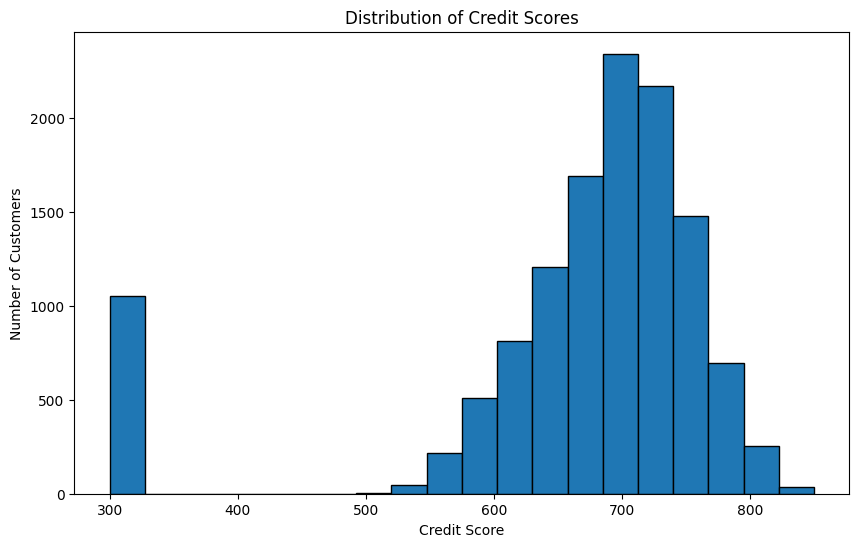

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(aggregated_df['Credit_Score'], bins=20, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Distribution of Credit Scores')
plt.show()

In [ ]:
# Calculate the count of credit scores in each range
poor_count = aggregated_df[aggregated_df['Credit_Score'] < 580]['Credit_Score'].count()
fair_count = aggregated_df[(aggregated_df['Credit_Score'] >= 580) & (aggregated_df['Credit_Score'] < 670 )]['Credit_Score'].count()
good_count = aggregated_df[(aggregated_df['Credit_Score'] >= 670) & (aggregated_df['Credit_Score'] < 740 )]['Credit_Score'].count()
very_good_count = aggregated_df[(aggregated_df['Credit_Score'] >= 740) & (aggregated_df['Credit_Score'] < 800 )]['Credit_Score'].count()
exceptional_count = aggregated_df[aggregated_df['Credit_Score'] >= 800]['Credit_Score'].count()

# Calculate the total number of credit scores
total_count = aggregated_df['Credit_Score'].count()

# Calculate the percentages
poor_percent = (poor_count / total_count) * 100
fair_percent = (fair_count / total_count) * 100
good_percent = (good_count / total_count) * 100
very_good_percent = (very_good_count / total_count) * 100
exceptional_percent = (exceptional_count / total_count) * 100

# Print the percentages
print("Percentage of Poor Credit Scores: {:.2f}%".format(poor_percent))
print("Percentage of Fair Credit Scores: {:.2f}%".format(fair_percent))
print("Percentage of Good Credit Scores: {:.2f}%".format(good_percent))
print("Percentage of Very Good Credit Scores: {:.2f}%".format(very_good_percent))
print("Percentage of Exceptional Credit Scores: {:.2f}%".format(exceptional_percent))

Percentage of Poor Credit Scores: 11.15%
Percentage of Fair Credit Scores: 24.97%
Percentage of Good Credit Scores: 44.20%
Percentage of Very Good Credit Scores: 17.94%
Percentage of Exceptional Credit Scores: 1.74%


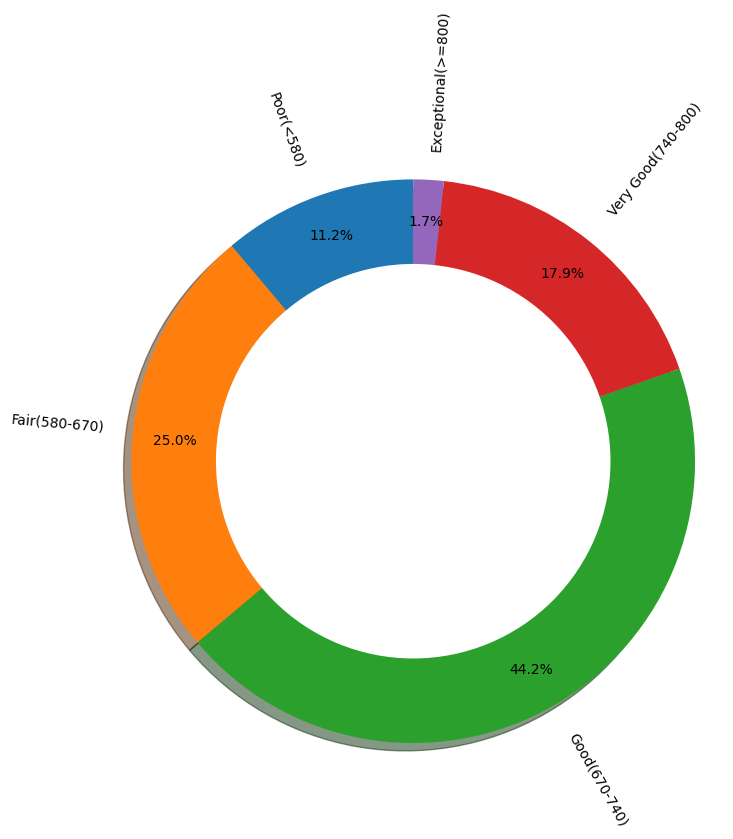

In [ ]:
labels = ['Poor(<580)', 'Fair(580-670)', 'Good(670-740)', 'Very Good(740-800)', 'Exceptional(>=800)']
sizes = [poor_percent, fair_percent, good_percent, very_good_percent, exceptional_percent]

# Create the pie chart with a larger figure size
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.85, rotatelabels=True)

# Draw circle for better visualization
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# Display the pie chart
plt.show()

This donut chart shows the distribution of customers by credit score:

Good (670-740): Largest group, 44.2%.

Fair (580-670): Second largest, 25.0%.

Very Good (740-800): 17.9%.

Poor (<580): 11.2%.

Exceptional (>=800): Smallest group, 1.7%.

Most customers have "Good" scores, while a significant portion falls into "Fair" or "Poor," indicating potential risk.

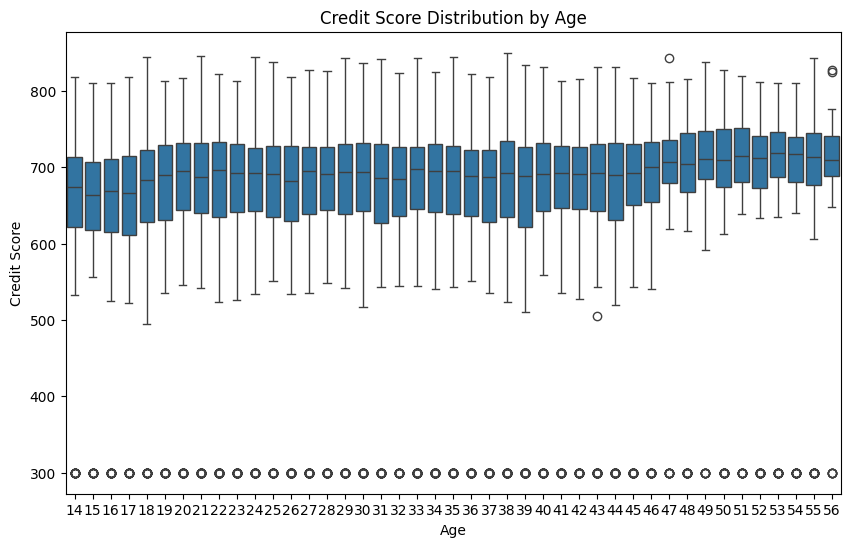

In [ ]:
#Age VS Credit score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Credit_Score', data=aggregated_df)
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Age')
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Age'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between age and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that older individuals tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that older individuals tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between age and credit score.")

Correlation coefficient: 0.05124866719012974
P-value: 9.86874471051667e-09
There is a statistically significant relationship between age and credit score.
The relationship is positive, suggesting that older individuals tend to have higher credit scores.


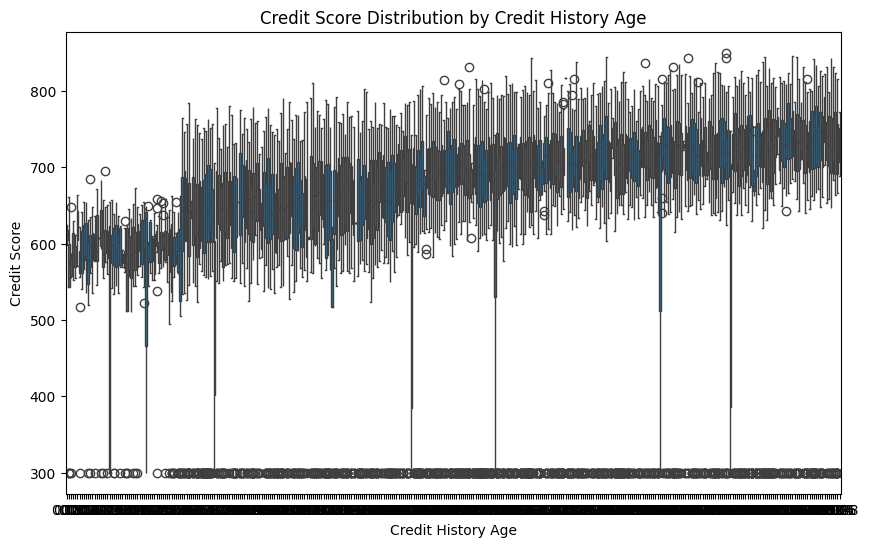

Correlation coefficient: 0.24201721662897374
P-value: 4.611097351837829e-166
There is a statistically significant relationship between Credit History Age and credit score.
The relationship is positive, suggesting that individuals with longer credit history tend to have higher credit scores.


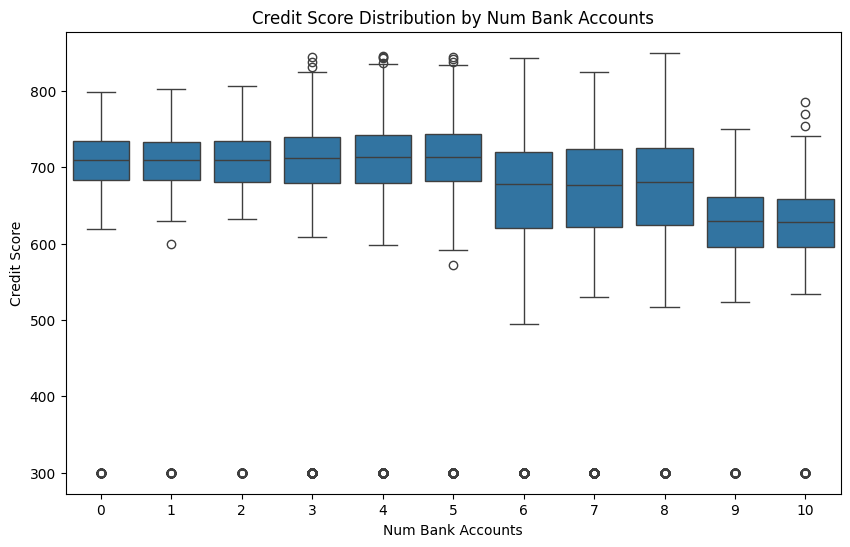

Correlation coefficient: -0.15955268416389695
P-value: 4.640997635289621e-72
There is a statistically significant relationship between Num Bank Accounts and credit score.
The relationship is negative, suggesting that individuals with more bank accounts tend to have lower credit scores.


In [ ]:
# Credit History Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History_Age', y='Credit_Score', data=aggregated_df)
plt.xlabel('Credit History Age')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Credit History Age')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Credit_History_Age'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Credit History Age and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with longer credit history tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with longer credit history tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Credit History Age and credit score.")

# Num Bank Accounts
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Bank_Accounts', y='Credit_Score', data=aggregated_df)
plt.xlabel('Num Bank Accounts')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Num Bank Accounts')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Num_Bank_Accounts'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Num Bank Accounts and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with more bank accounts tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with more bank accounts tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Num Bank Accounts and credit score.")


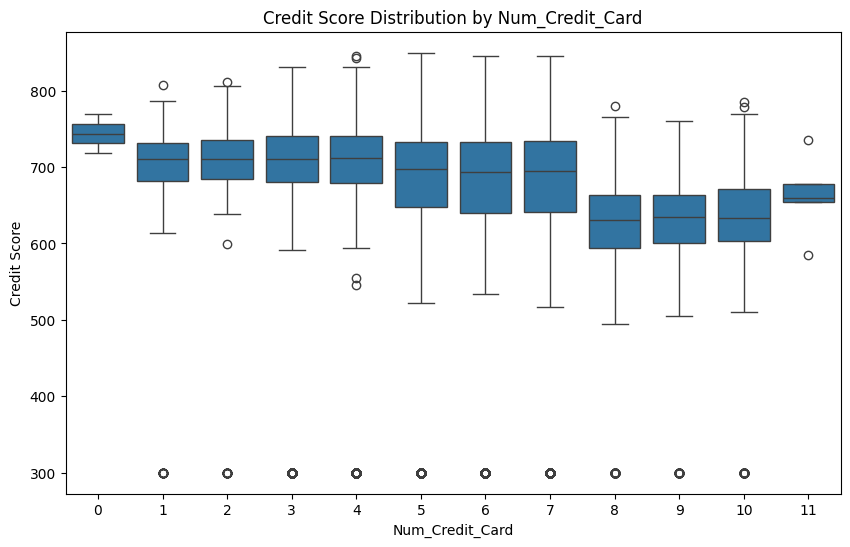

Correlation coefficient: -0.15871117896773457
P-value: 2.597873457294586e-71
There is a statistically significant relationship between Num_Credit_Card and credit score.
The relationship is negative, suggesting that individuals with more credit cards tend to have lower credit scores.


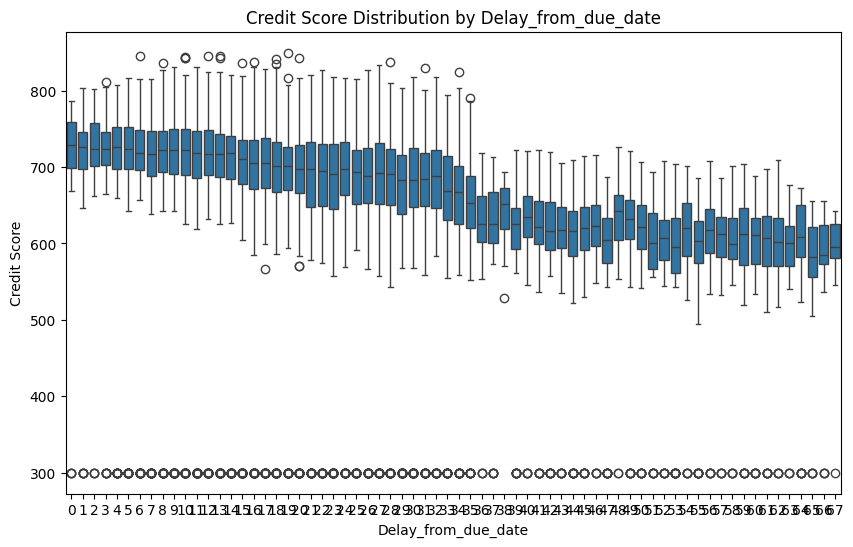

Correlation coefficient: -0.2662906557604839
P-value: 6.587494285231115e-202
There is a statistically significant relationship between Delay_from_due_date and credit score.
The relationship is negative, suggesting that individuals with longer delays from due date tend to have lower credit scores.


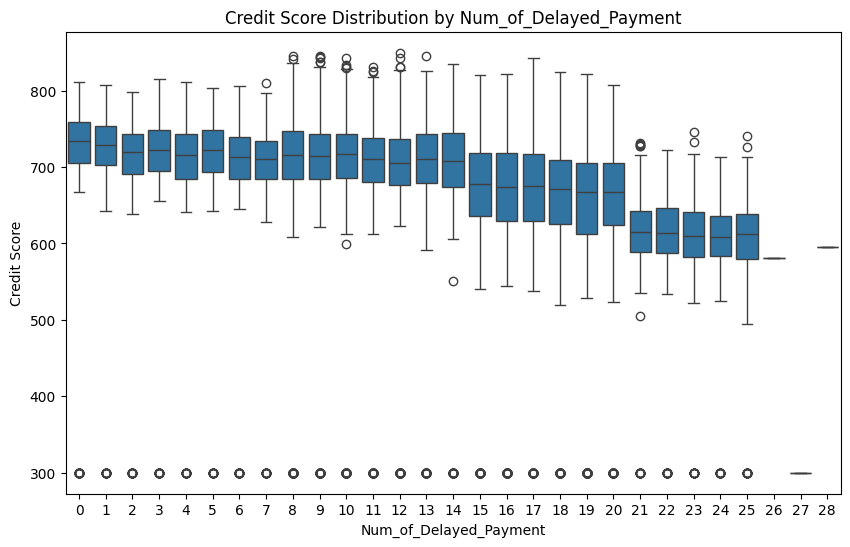

Correlation coefficient: -0.2161052413840395
P-value: 5.244041916187594e-132
There is a statistically significant relationship between Num_of_Delayed_Payment and credit score.
The relationship is negative, suggesting that individuals with more delayed payments tend to have lower credit scores.


In [ ]:
# Num_Credit_Card
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Credit_Card', y='Credit_Score', data=aggregated_df)
plt.xlabel('Num_Credit_Card')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Num_Credit_Card')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Num_Credit_Card'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Num_Credit_Card and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with more credit cards tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with more credit cards tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Num_Credit_Card and credit score.")

# Delay_from_due_date
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delay_from_due_date', y='Credit_Score', data=aggregated_df)
plt.xlabel('Delay_from_due_date')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Delay_from_due_date')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Delay_from_due_date'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Delay_from_due_date and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with longer delays from due date tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with longer delays from due date tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Delay_from_due_date and credit score.")

# Num_of_Delayed_Payment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_of_Delayed_Payment', y='Credit_Score', data=aggregated_df)
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Num_of_Delayed_Payment')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Num_of_Delayed_Payment'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Num_of_Delayed_Payment and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with more delayed payments tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with more delayed payments tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Num_of_Delayed_Payment and credit score.")

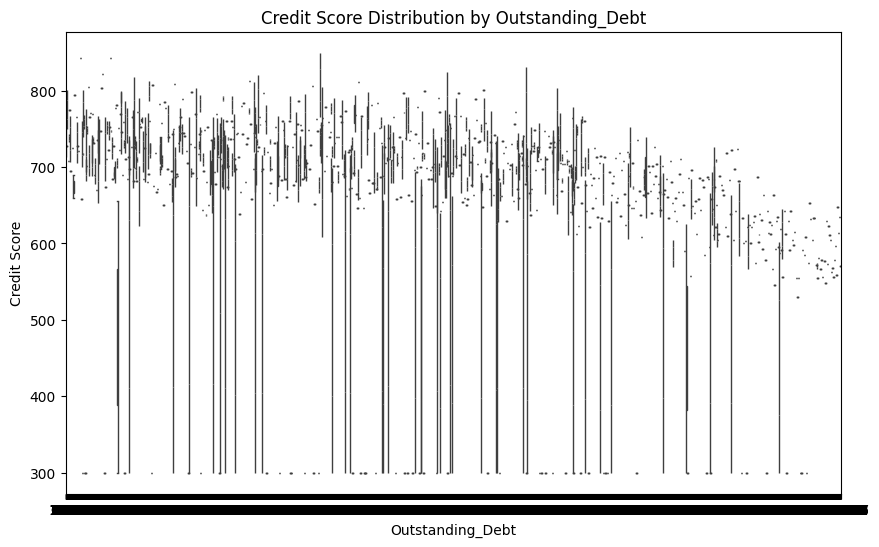

Correlation coefficient: -0.2988057962177033
P-value: 3.624375369694314e-256
There is a statistically significant relationship between Outstanding_Debt and credit score.
The relationship is negative, suggesting that individuals with higher outstanding debt tend to have lower credit scores.


In [ ]:
# Outstanding_Debt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outstanding_Debt', y='Credit_Score', data=aggregated_df)
plt.xlabel('Outstanding_Debt')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Outstanding_Debt')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Outstanding_Debt'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Outstanding_Debt and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with higher outstanding debt tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with higher outstanding debt tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Outstanding_Debt and credit score.")

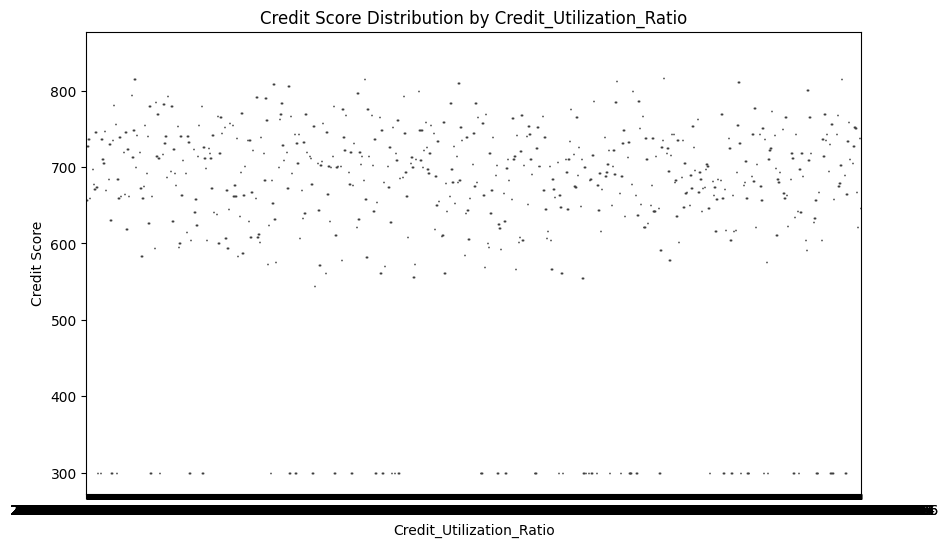

Correlation coefficient: -0.01444630965060666
P-value: 0.10629569520760365
There is no statistically significant relationship between Credit_Utilization_Ratio and credit score.


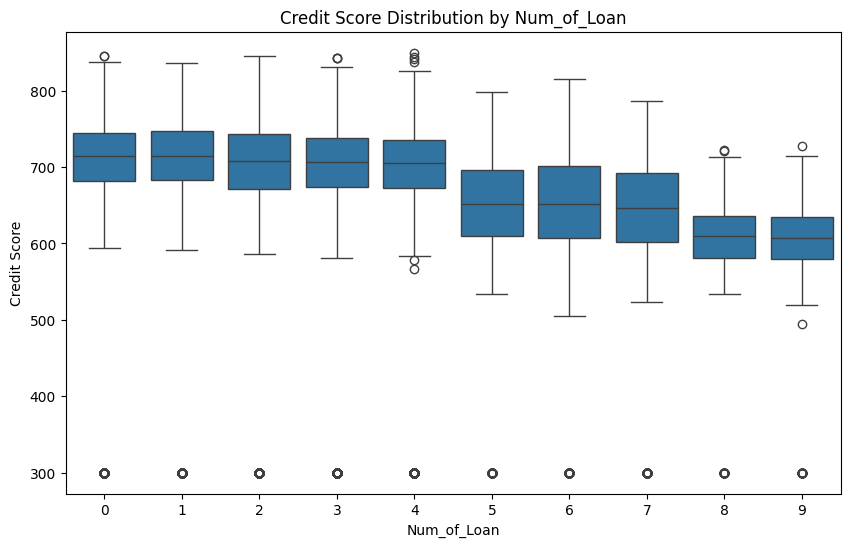

Correlation coefficient: -0.2232088149581014
P-value: 6.41064550912061e-141
There is a statistically significant relationship between Num_of_Loan and credit score.
The relationship is negative, suggesting that individuals with more loans tend to have lower credit scores.


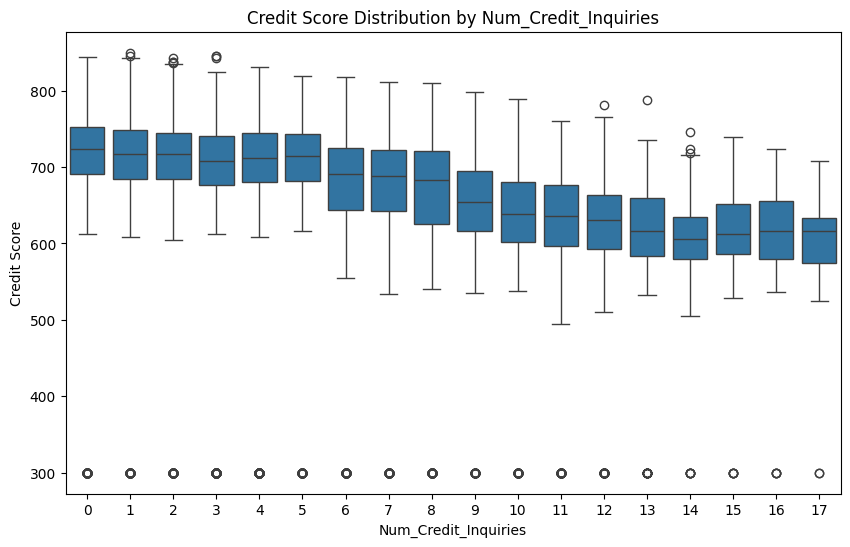

Correlation coefficient: -0.22765632668958324
P-value: 1.161337499851194e-146
There is a statistically significant relationship between Num_Credit_Inquiries and credit score.
The relationship is negative, suggesting that individuals with more credit inquiries tend to have lower credit scores.


In [ ]:
# Credit_Utilization_Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Utilization_Ratio', y='Credit_Score', data=aggregated_df)
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Credit_Utilization_Ratio')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Credit_Utilization_Ratio'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Credit_Utilization_Ratio and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with higher credit utilization ratios tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with higher credit utilization ratios tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Credit_Utilization_Ratio and credit score.")

# Num_of_Loan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_of_Loan', y='Credit_Score', data=aggregated_df)
plt.xlabel('Num_of_Loan')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Num_of_Loan')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Num_of_Loan'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Num_of_Loan and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with more loans tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with more loans tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Num_of_Loan and credit score.")

# Num_Credit_Inquiries
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Credit_Inquiries', y='Credit_Score', data=aggregated_df)
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Num_Credit_Inquiries')
plt.show()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(aggregated_df['Num_Credit_Inquiries'], aggregated_df['Credit_Score'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant relationship between Num_Credit_Inquiries and credit score.")
  if correlation > 0:
    print("The relationship is positive, suggesting that individuals with more credit inquiries tend to have higher credit scores.")
  else:
    print("The relationship is negative, suggesting that individuals with more credit inquiries tend to have lower credit scores.")
else:
  print("There is no statistically significant relationship between Num_Credit_Inquiries and credit score.")

## **Insights**
Positive Relationships:

Age: Older individuals tend to have higher credit scores.

Credit History Age: Longer credit history is associated with higher credit scores.

Negative Relationships:

Num Bank Accounts: Having more bank accounts is associated with lower credit scores.

Delay_from_due_date: Longer delays from due dates lead to lower credit scores.

Num_of_Delayed_Payment: More delayed payments are linked to lower credit scores.

Outstanding_Debt: Higher outstanding debt correlates with lower credit scores.

Num_Credit_Inquiries: More credit inquiries result in lower credit scores.

Num_of_Loan: Having more loans is associated with lower credit scores.

Neutral Relationship: Credit_Utilization_Ratio: No statistically significant relationship with credit scores.

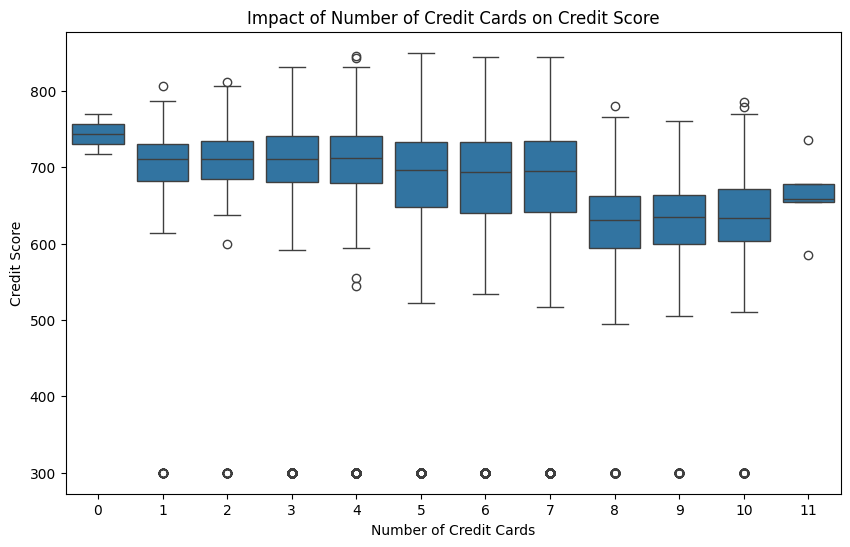

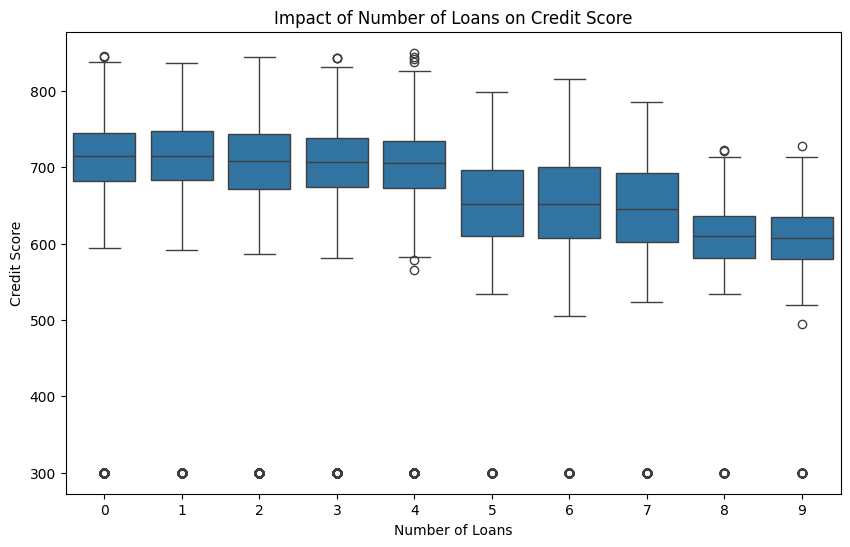

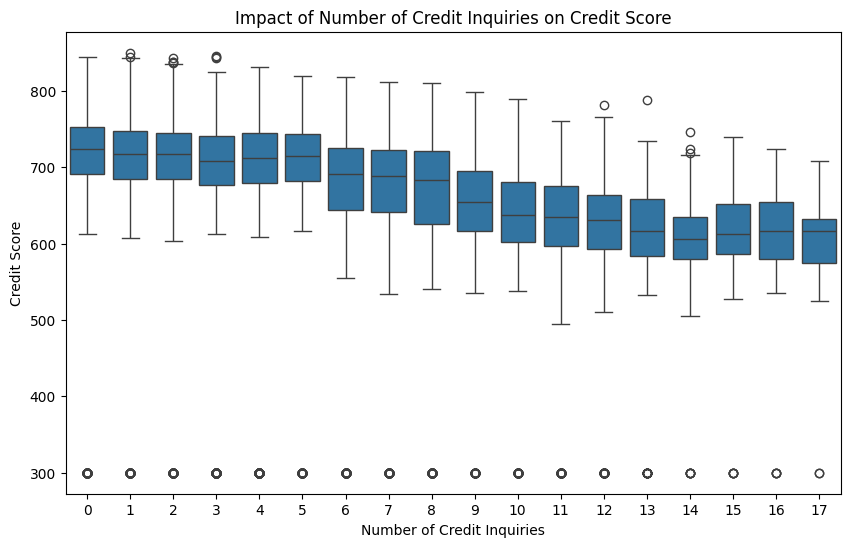

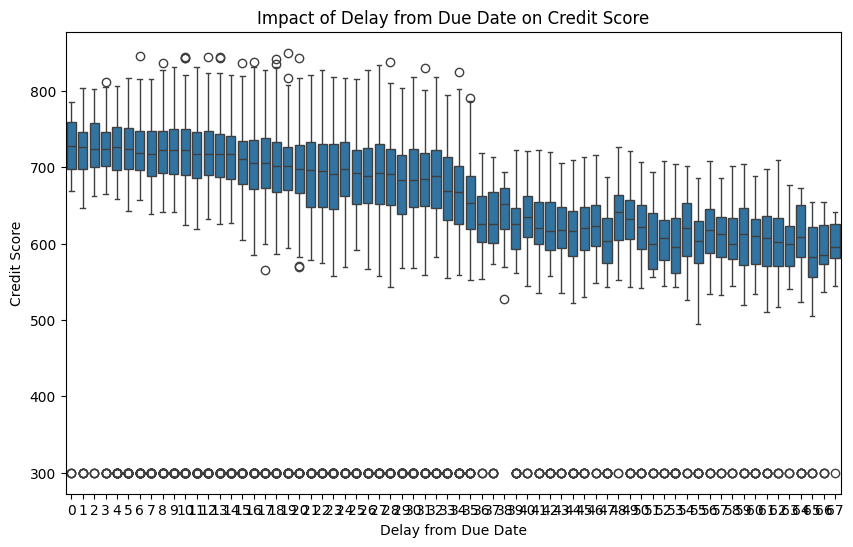

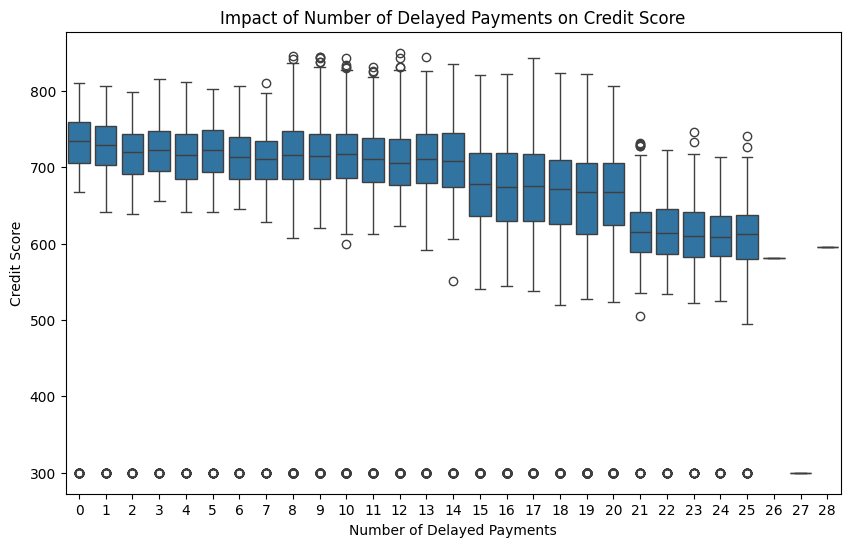

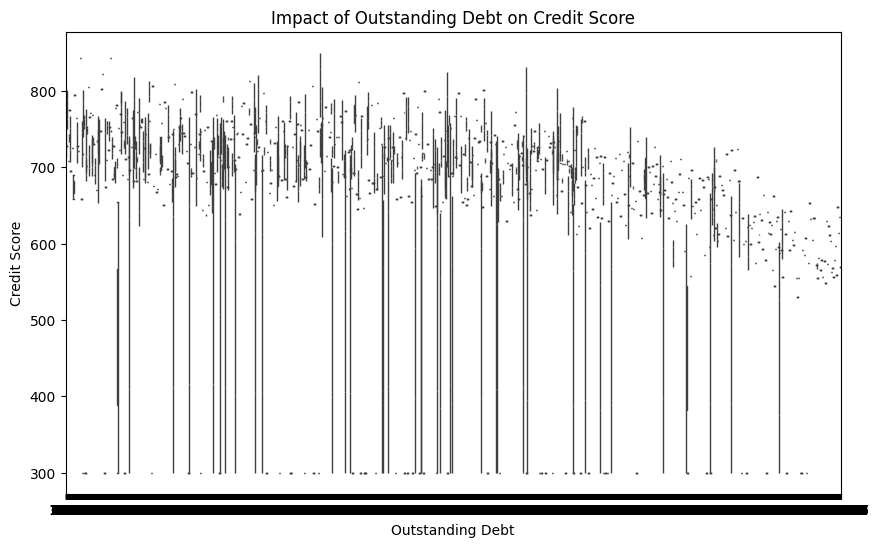

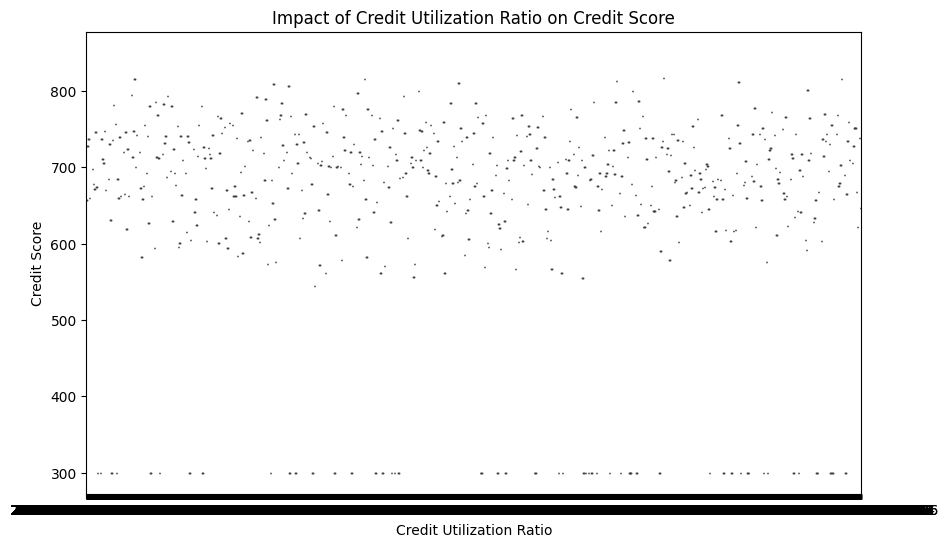

In [ ]:
# Credit Mix Impact

# Number of Credit Cards vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Credit_Card', y='Credit_Score', data=aggregated_df)
plt.xlabel('Number of Credit Cards')
plt.ylabel('Credit Score')
plt.title('Impact of Number of Credit Cards on Credit Score')
plt.show()

# Number of Loans vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_of_Loan', y='Credit_Score', data=aggregated_df)
plt.xlabel('Number of Loans')
plt.ylabel('Credit Score')
plt.title('Impact of Number of Loans on Credit Score')
plt.show()

# Credit Inquiries vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Credit_Inquiries', y='Credit_Score', data=aggregated_df)
plt.xlabel('Number of Credit Inquiries')
plt.ylabel('Credit Score')
plt.title('Impact of Number of Credit Inquiries on Credit Score')
plt.show()

# Payment Behavior Impact

# Delay from Due Date vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delay_from_due_date', y='Credit_Score', data=aggregated_df)
plt.xlabel('Delay from Due Date')
plt.ylabel('Credit Score')
plt.title('Impact of Delay from Due Date on Credit Score')
plt.show()

# Number of Delayed Payments vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_of_Delayed_Payment', y='Credit_Score', data=aggregated_df)
plt.xlabel('Number of Delayed Payments')
plt.ylabel('Credit Score')
plt.title('Impact of Number of Delayed Payments on Credit Score')
plt.show()

# Outstanding Debt vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outstanding_Debt', y='Credit_Score', data=aggregated_df)
plt.xlabel('Outstanding Debt')
plt.ylabel('Credit Score')
plt.title('Impact of Outstanding Debt on Credit Score')
plt.show()

# Credit Utilization Ratio vs Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_Utilization_Ratio', y='Credit_Score', data=aggregated_df)
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Credit Score')
plt.title('Impact of Credit Utilization Ratio on Credit Score')
plt.show()

## **Insights:**
Credit Mix: Having a mix of credit (loans and credit cards) can be beneficial, but too many can negatively impact scores. Frequent credit inquiries suggest credit-seeking behavior, potentially lowering scores.

Payment Behavior: Consistent on-time payments are crucial for good credit scores. Late payments and high outstanding debt significantly harm credit scores.

## **Recommendations:**
Maintain a healthy mix of credit, avoiding excessive accounts. Prioritize timely payments and minimize outstanding debt. Limit credit inquiries to essential needs.

In [ ]:
#Finally Credit Score for reference.
print(aggregated_df[['Customer_ID', 'Credit_Score']])

      Customer_ID  Credit_Score
0      CUS_0x1000           586
1      CUS_0x1009           818
2      CUS_0x100b           654
3      CUS_0x1011           774
4      CUS_0x1013           700
...           ...           ...
12495   CUS_0xff3           667
12496   CUS_0xff4           754
12497   CUS_0xff6           768
12498   CUS_0xffc           603
12499   CUS_0xffd           738

[12500 rows x 2 columns]
